In [1]:
library(ggplot2)
library(sqldf)
library(dplyr)
library(sp)
library(spacetime)
Sys.setlocale("LC_CTYPE", "thai")
options(encoding="UTF-8")

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in Sys.setlocale("LC_CTYPE", "thai"):
“OS reports request to set locale to "thai" cannot be honored”

[1] ""

In [2]:
sensorlist<-read.csv("https://raw.githubusercontent.com/Maplub/Jupyter/master/sensorlist_with_height.csv",stringsAsFactors = FALSE)
sensorlist[sensorlist$sensorid=="CU-S00054",3]<-"CU-S0054"
sensorlist[sensorlist$sensorid=="CU-S00083",3]<-"CU-S0083"
sensorlist[sensorlist$sensorid=="CU-S00103",3]<-"CU-S0103"
sensorlist[sensorlist$sensorid=="CU-S00104",3]<-"CU-S0104"
sensorlist$sensorid <- as.factor(sensorlist$sensorid)

In [44]:
daily<-read.csv("https://raw.githubusercontent.com/Maplub/AirQualityData/master/PM2-5_2018_daily.csv")

In [47]:
daily<-sqldf("select * from daily where time< '2018-04-01' and time> '2018-02-31'")

In [48]:
daily$time <- as.POSIXct(daily$time, "%Y-%m-%d")

In [53]:
daily<-sqldf("select * from daily where pm25<1000 and pm25>0")

In [54]:
countdata<-sqldf("select id,count(*) as count from daily group by id")

กรองข้อมูล เอาเซ็นเซอร์ที่มีน้อยกว่า 7 ข้อมูลออกไปเลย

In [55]:
daily<-daily[daily$id %in% countdata[countdata$count>7,1],]

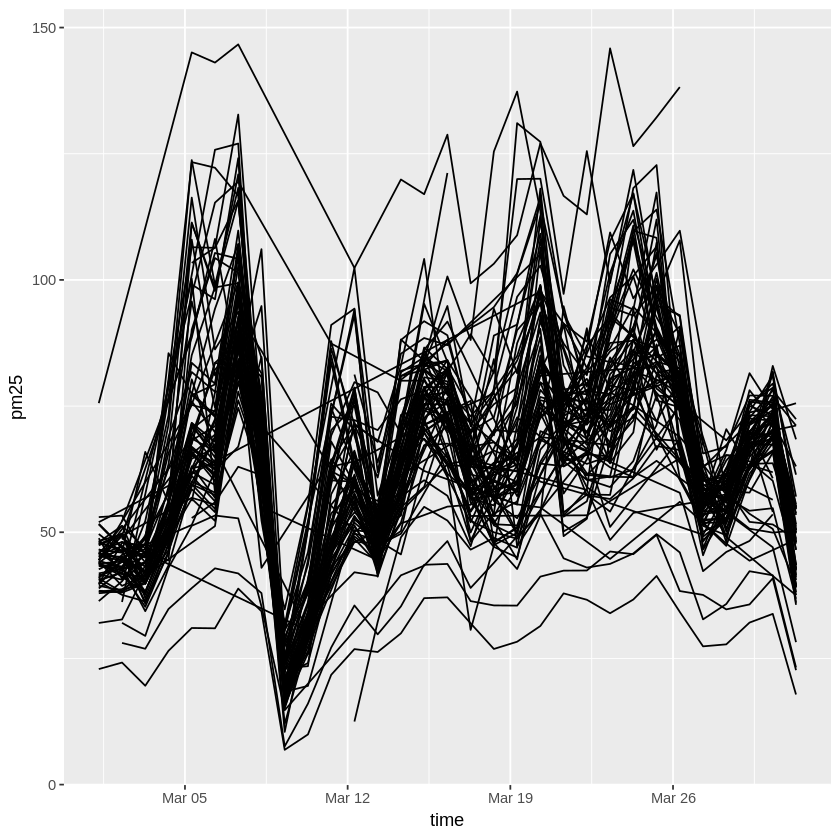

In [56]:
ggplot(daily,aes(time,pm25,group=id))+geom_line()

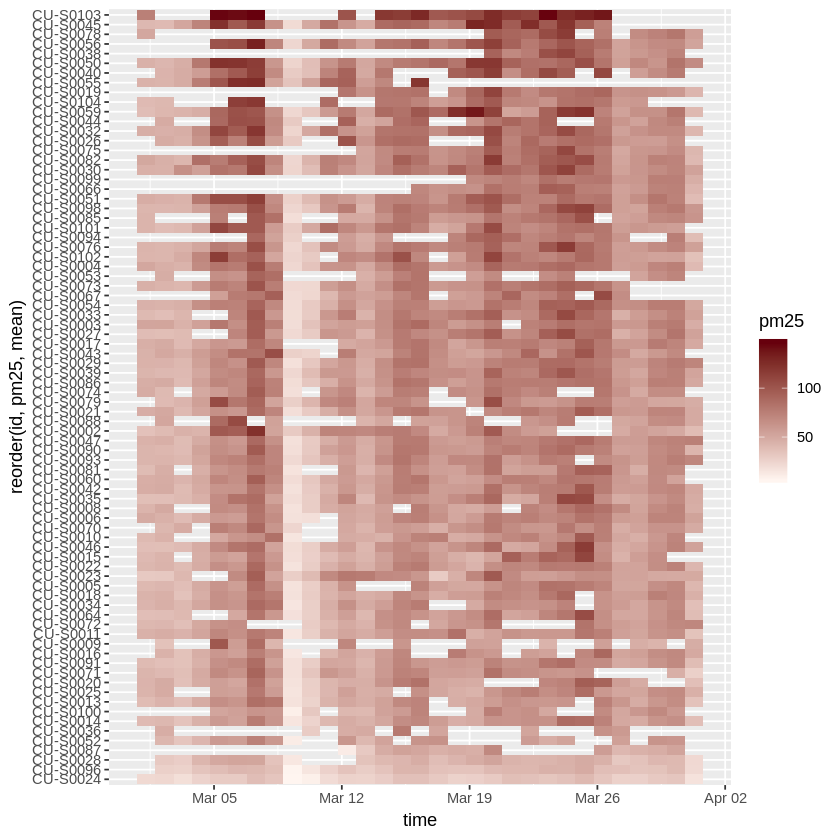

In [62]:
library(RColorBrewer)
colorsetting=brewer.pal(9,"Reds")
ggplot(data=daily, aes(x=time, y=reorder(id,pm25,mean))) + geom_tile(aes(fill=pm25)) + scale_fill_gradient(low=colorsetting[1],high=colorsetting[9])